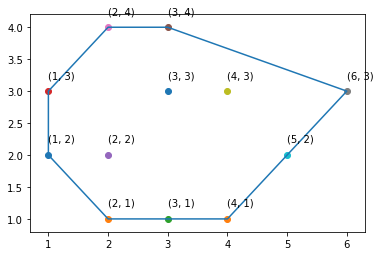

In [27]:
import matplotlib.pyplot as plt
import math
import copy
import numpy as np
class Point: 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y

def turntest(A,B,P):       
    c=copy.deepcopy(B)
    d=copy.deepcopy(P)
    c.x -= A.x 
    c.y -= A.y 
    d.x -= A.x 
    d.y -= A.y 
    cross_product = c.x * d.y - c.y * d.x  
    if (cross_product > 0): 
        return 1
    elif (cross_product < 0): 
        return -1
    else:
        return 0
    
def findextremeedge(pointlist):
    newlist=[]
    tuplelist=[]
    i=0
    j=0
    k=0
    l=0
    for i in range (0,len(pointlist)):
        tuplelist.append((pointlist[i].x,pointlist[i].y))
        Pi=pointlist[i]
        for j in range (0,len(pointlist)):
            if j==i:
                continue
            Pj=pointlist[j]
            global leftturn
            global rightturn
            leftturn=rightturn=0
            for k in range (0,len(pointlist)):
                if k==j or k==i:
                    continue
                
                Pk=pointlist[k]
                a=copy.deepcopy(Pi)
                b=copy.deepcopy(Pj)
                c=copy.deepcopy(Pk)
                
                if turntest(a,b,c)==1:
                    leftturn+=1
                elif turntest(a,b,c)==-1:
                    rightturn+=1      
#                 print((a.x,a.y),(b.x,b.y),(c.x,c.y),leftturn,rightturn)
            if leftturn==0 and rightturn !=0:
                newlist.append((pointlist[i].x,pointlist[i].y))
                newlist.append((pointlist[j].x,pointlist[j].y))
    return newlist,tuplelist

def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

pointlist = []
pointlist.append( Point(1,2) )
pointlist.append( Point(2,1) )
pointlist.append( Point(3,1) )
pointlist.append( Point(1,3) )
pointlist.append( Point(2,2) )
pointlist.append( Point(3,4) )
pointlist.append( Point(2,4) )
pointlist.append( Point(6,3) )
pointlist.append( Point(4,3) )
pointlist.append( Point(5,2) )
pointlist.append( Point(3,3) )
pointlist.append( Point(4,1) )


newlist=findextremeedge(pointlist)
ip=Diff(newlist[0],newlist[1])
op=Diff(newlist[1],ip)
cent=(sum([p[0] for p in op])/len(op),sum([p[1] for p in op])/len(op))
# sort by polar angle
op.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
convex_hull=copy.deepcopy(op)
convex_hull.append(convex_hull[0])
xs, ys = zip(*convex_hull) #create s of x and y values
plt.figure()
plt.plot(xs,ys)
for obj in pointlist:
    plt.scatter(obj.x, obj.y)
    plt.annotate((obj.x,obj.y), (obj.x, obj.y + 0.2))
    